In [46]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import PandasTools
import pandas as pd
import csv

In [47]:
PandasTools.RenderImagesInAllDataFrames(images=True)

In [3]:
with open("./cannabinoid_receptor_data.csv", "r") as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    ligs = []
    for m in reader:
        mol = Chem.MolFromSmiles(m['Smiles'])
        # get the standardized pChEMBL activity measure for future use
        pchembl = m['pChEMBL Value']
        if not pchembl:
            # some don't have any comparable pChEMBL value, just assign them very low value
            pchembl = -1
        mol.SetDoubleProp('pChEMBL', float(pchembl)) # save the value into mol instance
        ligs.append(mol)

suppl = Chem.SDMolSupplier('../data/drugbank.sdf')
drugs = [m for m in suppl if m]

RDKit ERROR: [12:18:51] ERROR: Explicit valence for atom # 0 C greater than permitted
[12:18:51] ERROR: Explicit valence for atom # 0 C greater than permitted
[12:19:34] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [12:19:34] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [12:19:34] ERROR: Could not sanitize molecule ending on line 20009
[12:19:34] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [12:19:34] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[12:19:34] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[12:19:35] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10

RDKit ERROR: [12:19:35] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [12:19:35] ERROR: Could not sanitize molecule ending on line 250947
[12:19:35] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [12:19:35] ERROR: Can't kekulize

RDKit ERROR: [12:19:35] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
[12:19:35] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13

[12:19:35] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7

RDKit ERROR: 
RDKit ERROR: [12:19:35] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
RDKit ERROR: 
RDKit ERROR: [12:19:35] ERROR: Could not sanitize molecule ending on line 371006
RDKit ERROR: [12:19:35] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[12:19:35] ERROR: Could not sanitize molecule ending on line 371006
[12:19:35] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7

[12:19:36] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9

RDKit ERROR: 
RDKit ERROR: [12:19:36] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [12:19:36] ERROR: Could not sanitize molecule ending on line 378618
[12:19:36] ERROR: Could not sanitize molecule ending on line 378618
RDKit ERROR: [12:19:36] ERROR: Can

[12:19:36] ERROR: Could not sanitize molecule ending on line 480504
RDKit ERROR: [12:19:36] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 12
[12:19:36] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 12

[12:19:36] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: 
RDKit ERROR: [12:19:36] Explicit valence for atom # 2 O, 3, is greater than permitted
RDKit ERROR: [12:19:36] ERROR: Could not sanitize molecule ending on line 499305
[12:19:36] ERROR: Could not sanitize molecule ending on line 499305
RDKit ERROR: [12:19:36] ERROR: Explicit valence for atom # 2 O, 3, is greater than permitted
[12:19:36] ERROR: Explicit valence for atom # 2 O, 3, is greater than permitted
[12:19:36] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9

RDKit ERROR: [12:19:36] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
RDKit ERROR: 
RDKit ERROR: [12:19:36] ERROR: Could not sanitize molecule ending on line 503342
[12:19:36] ERROR: Could not sanitize m

RDKit ERROR: [12:19:36] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
[12:19:36] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13

[12:19:36] Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: 
RDKit ERROR: [12:19:36] Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [12:19:36] ERROR: Could not sanitize molecule ending on line 636938
RDKit ERROR: [12:19:36] ERROR: Explicit valence for atom # 19 N, 4, is greater than permitted
RDKit ERROR: [12:19:36] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [12:19:36] ERROR: Could not sanitize molecule ending on line 640674
RDKit ERROR: [12:19:36] ERROR: Explicit valence for atom # 0 O, 3, is greater than permitted
[12:19:36] ERROR: Could not sanitize molecule ending on line 636938
[12:19:36] ERROR: Explicit valence for atom # 19 N, 4, is greater than permitted
[12:19:36] Explicit valence for atom # 0 O, 3, is greater than perm

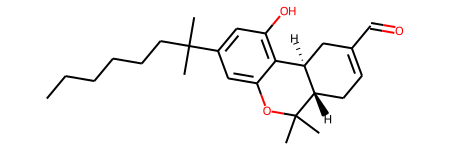

In [4]:
ligs[0]

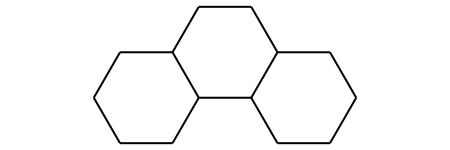

In [7]:
def scaffold(mol):
    Chem.rdmolops.RemoveStereochemistry(mol) # get rid of stereo, doesn't matter much in scaffolds
    try:
        scaff = MurckoScaffold.MakeScaffoldGeneric(mol) # all atoms->C all bonds-> single
    except ValueError: # if the structure can't be represented by C atoms, just return no scaffold.
        # if such functionality is really desired, then generic graphs can be used instead of C
        return None
    scaff = MurckoScaffold.GetScaffoldForMol(scaff) # remove all sidechains
    return scaff
scaffold(ligs[0])

In [8]:
drugbank_scaffolds = [scaffold(drug) for drug in drugs]
drugbank_scaffolds[:20]

RDKit ERROR: [12:19:38] ERROR: Explicit valence for atom # 0 C greater than permitted
[12:19:38] ERROR: Explicit valence for atom # 0 C greater than permitted
[12:22:01] Explicit valence for atom # 90 C, 6, is greater than permitted
RDKit ERROR: [12:22:01] Explicit valence for atom # 90 C, 6, is greater than permitted
RDKit ERROR: [12:22:01] Explicit valence for atom # 62 C, 6, is greater than permitted
[12:22:01] Explicit valence for atom # 62 C, 6, is greater than permitted
RDKit ERROR: [12:22:01] Explicit valence for atom # 6 C, 6, is greater than permitted
[12:22:01] Explicit valence for atom # 6 C, 6, is greater than permitted
RDKit ERROR: [12:22:03] Explicit valence for atom # 31 C, 6, is greater than permitted
[12:22:03] Explicit valence for atom # 31 C, 6, is greater than permitted
RDKit ERROR: [12:22:03] Explicit valence for atom # 14 C, 10, is greater than permitted
[12:22:03] Explicit valence for atom # 14 C, 10, is greater than permitted
RDKit ERROR: [12:22:05] Explicit val

 None,

In [9]:
drugbank_scaffolds_smiles = [(i, Chem.MolToSmiles(mol)) for i, mol in enumerate(drugbank_scaffolds) if mol]
drugbank_scaffolds_smiles[:20]

[(0,
  'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1'),
 (1,
  'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1'),
 (2, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (3,
  'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1'),
 (4, 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1'),
 (5, 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1'),
 (6, 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1'),
 (7, 'C1CCCCC1'),
 (9, 'C1CCC(CCC2CCC3CCCCC3C2)CC1'),
 (10, 'C1CCCC1'),
 (11, 'C1CCC2C(C1)CCC2C1CCCC1'),
 (12, ''),
 (13, 'C1CCCCC1'),
 (14, 'C1CC2CCCC2C1'),
 (15, ''),
 (16, ''),
 (17, ''),
 (18, 'C1CCCC1'),
 (19, ''),
 (20, '')]

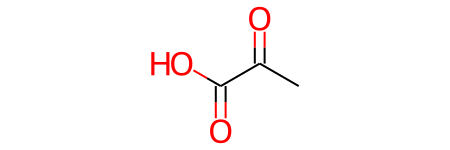

In [10]:
drugs[12]

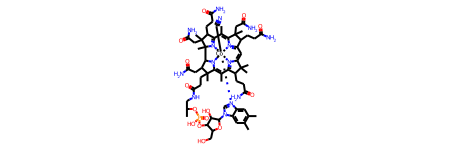

In [11]:
drugs[8]

In [12]:
scaffolds2drugs = {scaffoldsmiles:[] for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles}
for drug_idx, scaffoldsmiles in drugbank_scaffolds_smiles:
    scaffolds2drugs[scaffoldsmiles].append(drug_idx)
scaffolds2drugs

{'C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1': [0,
  2060],
 'C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1': [1,
  529],
 'C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1': [2, 5, 2325],
 'C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1': [3,
  4678],
 'C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1': [4],
 'C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1': [6],
 'C1CCCCC1': [7,
  13,
  27,
  39,
  54,
  56,
  59,
  67,
  72,
  73,
  78,
  81,
  82,
  89,
  102,
  108,
  112,
  123,
  126,
  127,
  131,
  134,
  149,
  154,
  155,
  161,
  171,
  181,
  192,
  196,
  198,
  202,
  206,
  224,
  228,
  234,
  257,
  258,
  268,
  276,
  285,
  305,
  306,
  310,
  315,
  318,
  333,
  336,
  346,
  350,
  361,
  370,
  375,
  376,
  378,
  381,
  386,
  408,
  416,
  429,
  430,
  435,
  443,
  459,
  477,
  479,
  484,
  494,
  495,
  497,
  512,
  514,

In [13]:
scaffold_drugcount = [(scaffold, len(drugs)) for scaffold, drugs in scaffolds2drugs.items()]
len(scaffold_drugcount), scaffold_drugcount[:20]

(1545,
 [('C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1',
   2),
  ('C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1',
   2),
  ('C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1', 3),
  ('C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1',
   2),
  ('C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1', 1),
  ('C1CCCCCCC(CCCCC2CCCCC2)CCC(CC2CCCCC2)CCC(CC2CCC3CCCCC32)CCCCCC1', 1),
  ('C1CCCCC1', 1039),
  ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 54),
  ('C1CCCC1', 188),
  ('C1CCC2C(C1)CCC2C1CCCC1', 165),
  ('', 976),
  ('C1CC2CCCC2C1', 15),
  ('C1CCC(CCC2CCCC3CCCC32)CC1', 28),
  ('C(CCCCCCCCCC1CCCCC1)CCCCCCCCC1CCCCC1', 2),
  ('C1CCC2CC3CCCCC3CC2C1', 57),
  ('C1CCC2CCCC2C1', 192),
  ('C1CCC(CC2CCCC2)CC1', 74),
  ('C(CCCC1CCC(C2CCCCC2)C1)CCCC1CCC(C2CCC3CCCCC32)C1', 17),
  ('C1CCC2CCCCC2C1', 170),
  ('C1CCC(C2CCCCC2C2CCCC2)CC1', 1)])

In [14]:
scaffold_drugcount.sort(key=lambda x: x[1], reverse=True)
scaffold_drugcount[:20]

[('C1CCCCC1', 1039),
 ('', 976),
 ('C1CCC2CCCC2C1', 192),
 ('C1CCCC1', 188),
 ('C1CCC(CC2CCCCC2)CC1', 182),
 ('C1CCC(C2CCCC2)CC1', 176),
 ('C1CCC2CCCCC2C1', 170),
 ('C1CCC2C(C1)CCC2C1CCCC1', 165),
 ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 151),
 ('C1CCC(CCC2CCCCC2)CC1', 106),
 ('C1CCC(C2CCCCC2)CC1', 105),
 ('C1CCC(CC2CCCC2)CC1', 74),
 ('C1CCC(CCCC2CCCCC2)CC1', 66),
 ('C1CCC2CC3CCCCC3CC2C1', 57),
 ('C1CCC(CCC2CCC3CCCCC3C2)CC1', 54),
 ('C1CCC(CCCCC2CCCCC2)CC1', 53),
 ('C1CCC(C2CC3CCCCC3C2)CC1', 48),
 ('C1CCC(CCC2CCCC2)CC1', 43),
 ('C1CCC(C2CCC3CCCCC3C2)CC1', 41),
 ('C1CCC(CC2CCCC(CC3CCCCC3)C2)CC1', 34)]

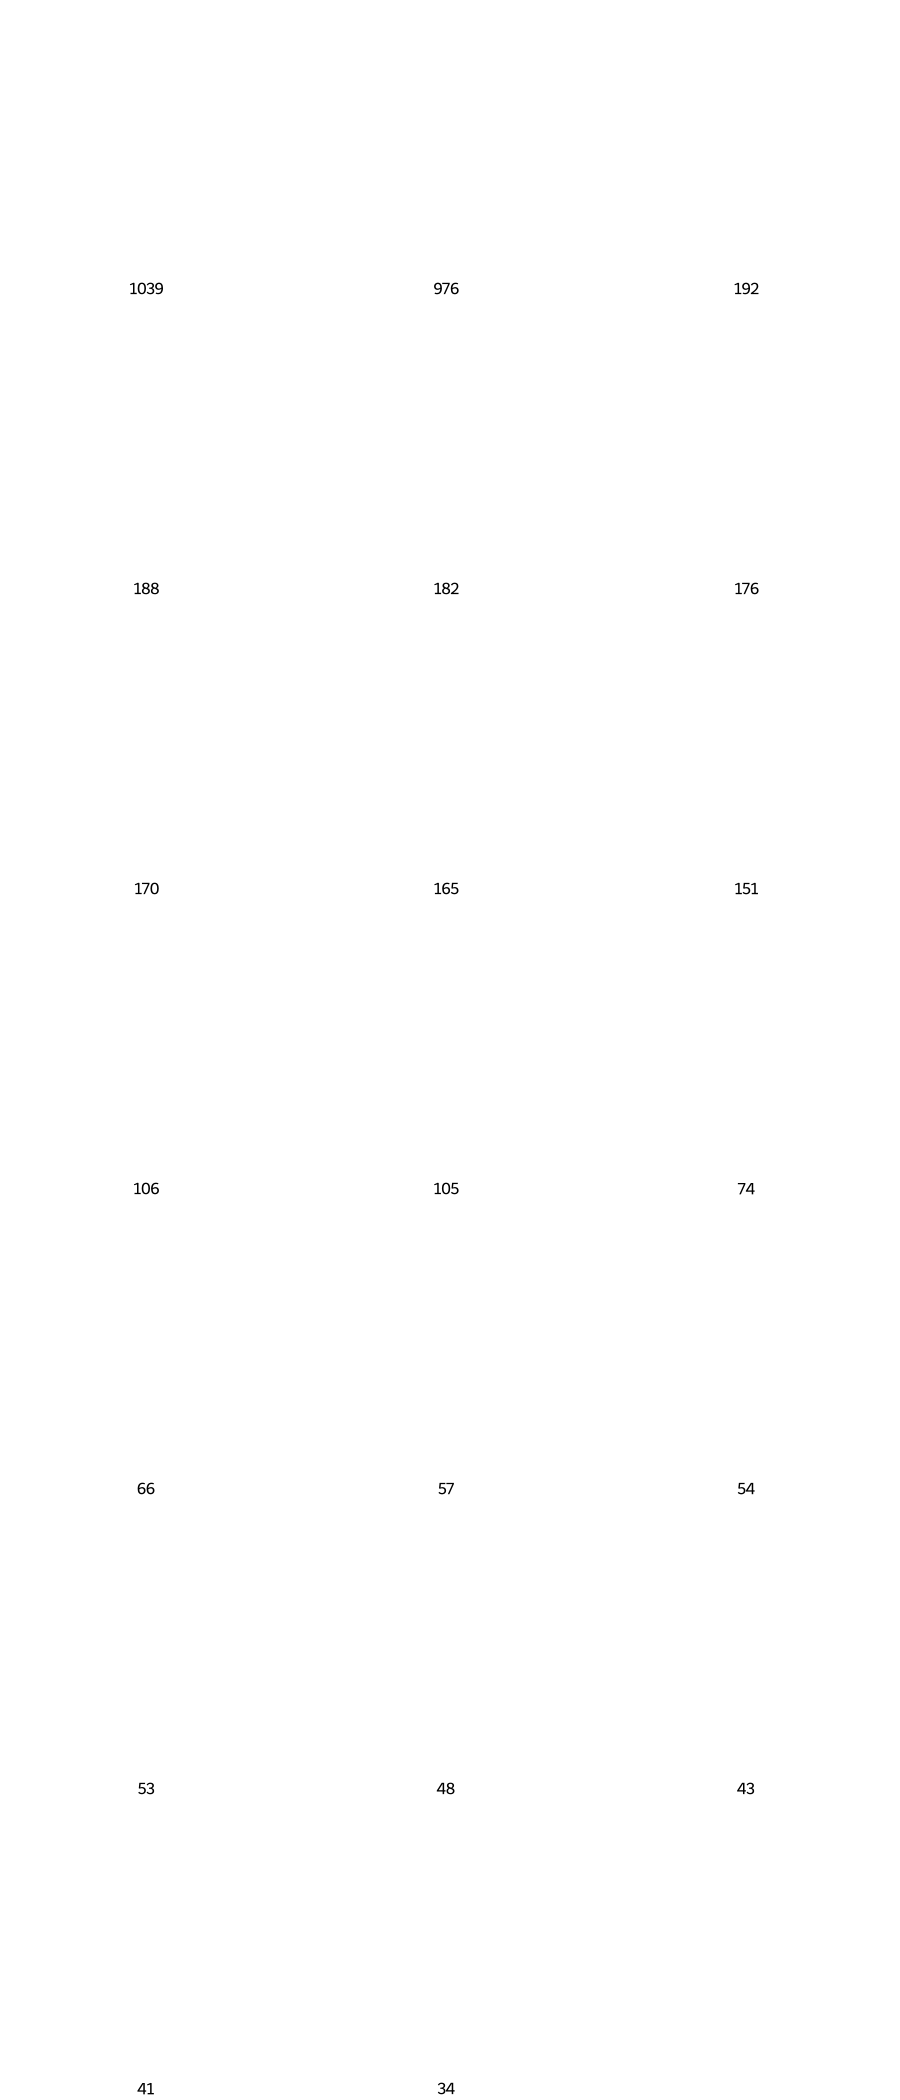

In [39]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_drugcount[:20]],
                     molsPerRow=3, subImgSize = (300,300),
                     legends=[str(count) for scaffold, count in scaffold_drugcount[:20]])

In [68]:
pic_count = []
for scaffold, count in scaffold_drugcount:
    m = Chem.MolFromSmiles(scaffold)
    pic_count.append([m, count])
dataframe = pd.DataFrame([pic_count[:20]])
dataframe.ndim

2

In [56]:
pic_count

[(<rdkit.Chem.rdchem.Mol at 0x7f8f7a5ee8a0>, 1039),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a5ee990>, 192),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a5ee8f0>, 188),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a5ee9e0>, 182),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a5eeb20>, 176),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a5eeb70>, 170),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a5eea30>, 165),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a5eebc0>, 151),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a5eeda0>, 106),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a5eea80>, 105),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a5eed00>, 74),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a5eeee0>, 66),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a5eef80>, 57),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a574580>, 54),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a574030>, 53),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a574080>, 48),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a5740d0>, 43),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a574120>, 41),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a574f80>, 34),
 (<rdkit.Chem.rdchem.Mol at 0x7f8f7a574

In [16]:
can_scaffolds_smiles = [(i, Chem.MolToSmiles(scaffold(ligand))) for i, ligand in enumerate(ligs)]
can_scaffolds_smiles[:20]

[(0, 'C1CCC2C(C1)CCC1CCCCC12'),
 (1, 'C1CCC2CCCCC2C1'),
 (2, 'C(CCCCC1CCCC2CCCCC12)CCCC1CC1'),
 (3, 'C1CCC2CCCC2C1'),
 (4, 'C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1'),
 (5, 'C1CCC(CCC2CC3CC(C4CCCCC4)CC3C3CCCCC23)CC1'),
 (6, 'C1CCCC(CCC2CC3CCCCC3C(CCC3CCCCC3)C2)CC1'),
 (7, 'C1CCC(C2CCC(CCCC3CCCC3)CC2)CC1'),
 (8, 'C1CCC(C2CCC(CCCC3CCCC3)CC2)CC1'),
 (9, 'C1CCC(CC2CCCC(CCC3CC4CCC3C4)C2)CC1'),
 (10, 'C(CCCCCCCC1CC1)CCCCCCC1CCCCC1'),
 (11, 'C1CCC(CC2CC(CC3CC3)C3CCCCC23)CC1'),
 (12, 'C1CCC(CCC2CC(CC3CC3)C3CCCCC23)CC1'),
 (13, 'C1CCC(CC2CC(CC3CC3)C3CC4CCCC4CC23)CC1'),
 (14, 'C1CCC(CCC2CCCC3C(CC4CC4)CC(CC4CCCCC4)C23)CC1'),
 (15, 'C1CCC(CC2CC(CC3CC3)C3CCCCC23)CC1'),
 (16, 'C1CCC(CC2CC(CC3CC3)C3CCCCC23)CC1'),
 (17, 'C1CCC(CCC2CC(CC3CCCCC3)C3CCCCC23)CC1'),
 (18, 'C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1'),
 (19, 'C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1')]

In [24]:
scaffolds2ligands = {scaffoldsmiles:[] for ligand_idx, scaffoldsmiles in can_scaffolds_smiles}
for ligand_idx, scaffoldsmiles in can_scaffolds_smiles:
    scaffolds2ligands[scaffoldsmiles].append(ligand_idx)
scaffolds2ligands

{'C1CCC2C(C1)CCC1CCCCC12': [0,
  22,
  31,
  40,
  44,
  47,
  49,
  50,
  88,
  143,
  145,
  152,
  154,
  196,
  197,
  241,
  245,
  252,
  253,
  258,
  259,
  260,
  267,
  268,
  283,
  313,
  314,
  335,
  341,
  344,
  360,
  436,
  480,
  482,
  506,
  531,
  533,
  534,
  775,
  808,
  920,
  921,
  962,
  971,
  974,
  1033,
  1035,
  1071,
  1144,
  1200,
  1229,
  1238,
  1248,
  1249,
  1250,
  1270,
  1277,
  1288,
  1417,
  1449,
  1461,
  1474,
  1517,
  1518,
  1519,
  1520,
  1566,
  1603,
  1616,
  1632,
  1697,
  1741,
  1746,
  1757,
  1898,
  1899,
  1947,
  1963,
  1967,
  1983,
  1990,
  1991,
  2029,
  2036,
  2248,
  2259,
  2270,
  2301,
  2342,
  2397,
  2428,
  2450,
  2453,
  2480,
  2481,
  2487,
  2488,
  2557,
  2562,
  2586,
  2587,
  2588,
  2608,
  2710,
  2750,
  2762,
  2764,
  2799,
  2832,
  2833,
  2834,
  2839,
  2917,
  2922,
  2945,
  3012,
  3030,
  3042,
  3164,
  3173,
  3181,
  3188,
  3199,
  3200,
  3250,
  3336,
  3374,
  3419,
  346

In [25]:
scaffold_ligandcount = [(scaffold, len(ligands)) for scaffold, ligands in scaffolds2ligands.items()]
scaffold_ligandcount.sort(key=lambda x: x[1], reverse=True)
len(scaffold_ligandcount), scaffold_ligandcount

(1028,
 [('C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1', 330),
  ('C1CCCCC1', 273),
  ('C1CCC2C(C1)CCC1CCCCC12', 177),
  ('', 173),
  ('C1CCC(C2CCCCC2)CC1', 145),
  ('C1CCC(CCCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1', 87),
  ('C1CCC(CC2CC(CC3CC3)C3CCCCC23)CC1', 82),
  ('C1CCC2C(C1)CCCC2CC1CCC2CCCCC21', 82),
  ('C1CCC(CC2CCCCC2)CC1', 72),
  ('C1CCC(CC2CCC3CCCC4C(CC5CCCC6CCCCC65)CC2C34)CC1', 70),
  ('C1CCC(C2CCCC2C2CCCCC2)CC1', 59),
  ('C1CCC(C2CCCC3C2CC(C2CCCCC2)C3C2CCCCC2)CC1', 57),
  ('C1CCC(CCC2CC(CC3CCCCC3)C3CCCCC23)CC1', 54),
  ('C1CCC2CCCCC2C1', 52),
  ('C1CCC(C2CC3CCCCC3C2C2CCCCC2)CC1', 51),
  ('C1CCC2CC(CCC34CC5CC(CC(C5)C3)C4)CCC2C1', 49),
  ('C1CCC(CC2CCC3CCCCC3C2)CC1', 48),
  ('C1CCC(CCC2CCC(C3CCCC4C3CC(C3CCCCC3)C4C3CCCCC3)CC2)CC1', 47),
  ('C1CCC(CCC2CC(CC3CC3)C3CCCCC23)CC1', 46),
  ('C1CCC(CC2CC(CCC3CC4CCC3C4)CC2C2CCCCC2)CC1', 46),
  ('C1CCC(CC2CCCCC2CC2CCCCC2)CC1', 44),
  ('C1CCC(CCC2CC(C3CCCCC3)C(C3CCCC3)C2)CC1', 43),
  ('C1CCC2C(C1)CCC1C3CCCC3CCC21', 43),
  ('C1CCC(CC2CCC3C(CCC4CCCCC

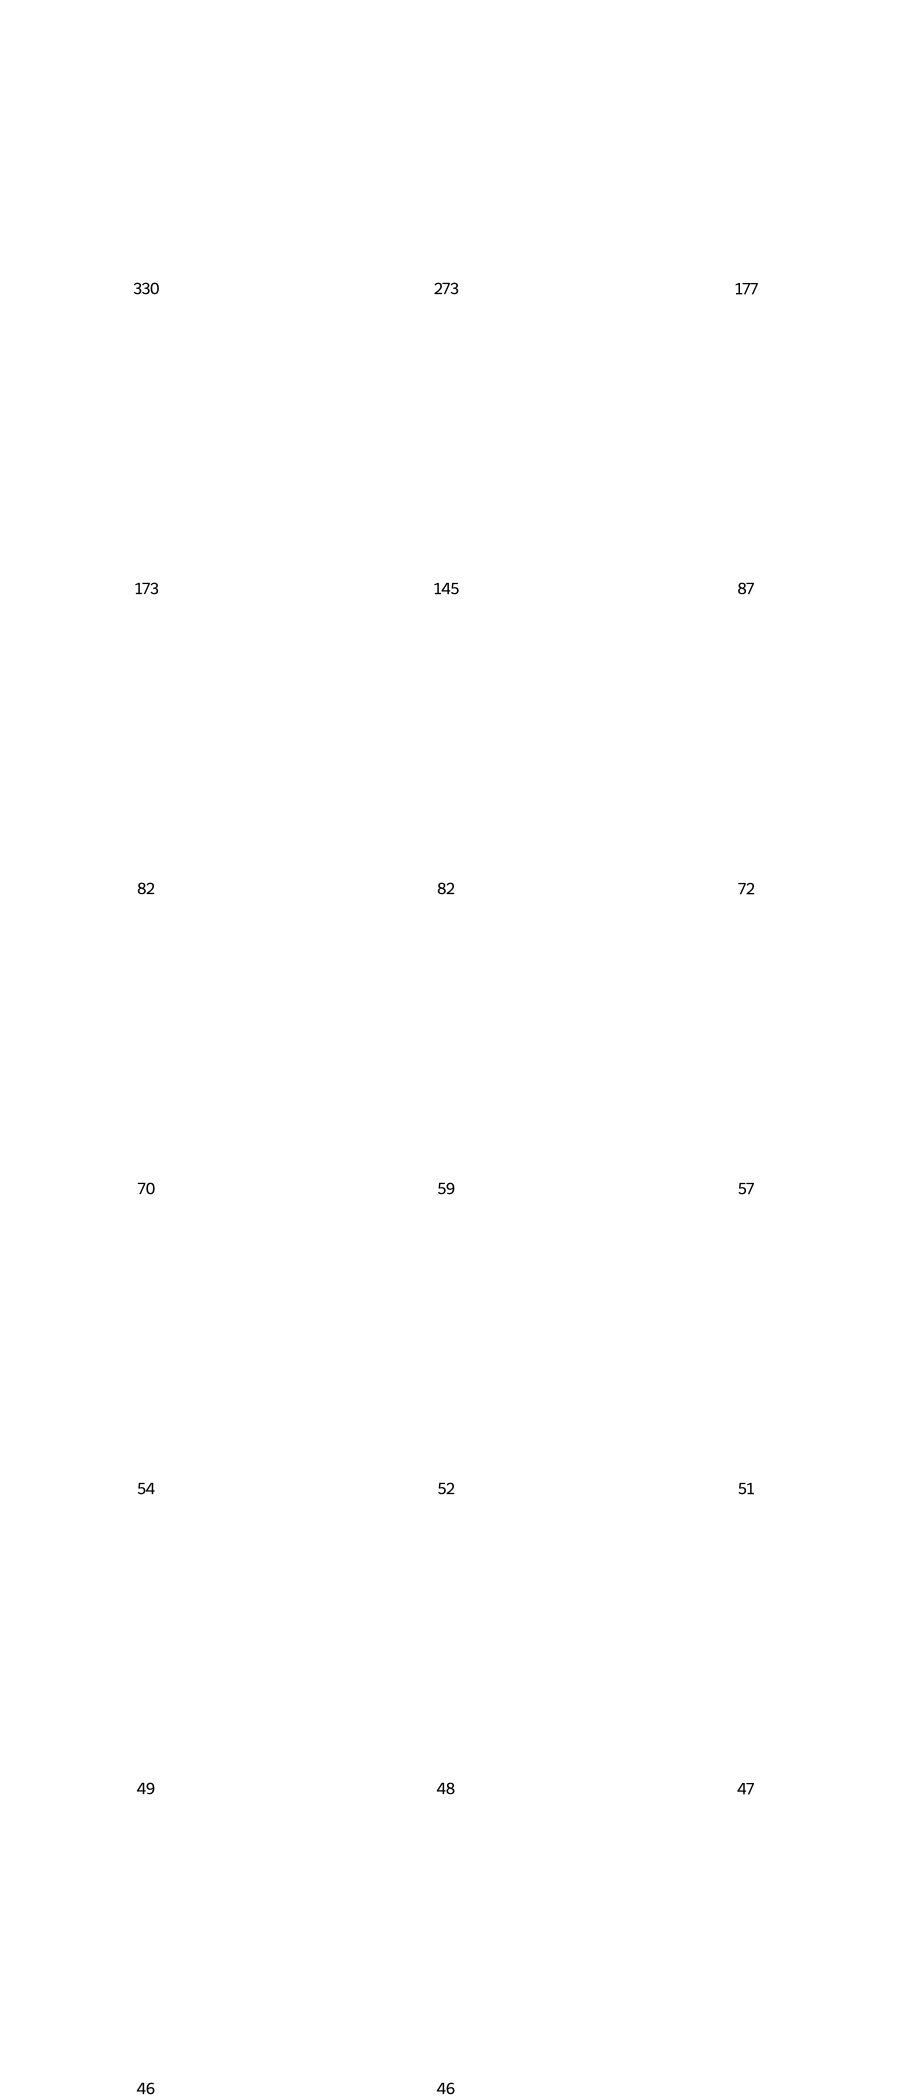

In [27]:
Draw.MolsToGridImage([Chem.MolFromSmiles(scaffold) for scaffold, count in scaffold_ligandcount[:20]],
                     molsPerRow=3, subImgSize=(300,300),
                     legends=[str(count) for scaffold, count in scaffold_ligandcount[:20]])

In [30]:
scaffold_ligandcount[0]

('C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1', 330)

In [31]:
x, y = scaffold_ligandcount[0]

In [33]:
x

'C1CCC(CCC2CC(C3CCCCC3)C(C3CCCCC3)C2)CC1'

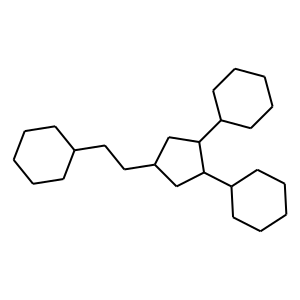

In [34]:
m = Chem.MolFromSmiles(x)
Draw.MolToImage(m)